# Analiza danych z Instagrama
## Wczytanie danych

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('instagram_data.csv')

print(df)

                                         Link                  Username  \
0    https://www.instagram.com/p/CrZxnuyocmZ/   christopherraunleth_cph   
1    https://www.instagram.com/p/CqnyK7BrlQm/  zelensky_volodymyr_olena   
2    https://www.instagram.com/p/CrOrGigIarT/         ellie.on.the.road   
3    https://www.instagram.com/p/Cq3iYEDOa5n/             zelensky.land   
4    https://www.instagram.com/p/CrfhUg-rpTI/             zutphenaanzee   
..                                        ...                       ...   
328  https://www.instagram.com/p/CrbeJTAuqMx/        zelenskiy.1978.fan   
329  https://www.instagram.com/p/CrbeDYPuPPH/        zelenskiy.1978.fan   
330  https://www.instagram.com/p/Crbd9zxu8ys/        zelenskiy.1978.fan   
331  https://www.instagram.com/p/CrbduhbuynV/        zelenskiy.1978.fan   
332  https://www.instagram.com/p/Crbd2emuhJX/        zelenskiy.1978.fan   

                                           Description  Likes  Comments  \
0    Almost like snow #k

## Preprocessing tekstu

In [115]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DAMS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
from nltk.corpus import stopwords

additional = ['e', 'la', 'il', 'di', 'che', 'per', 'oggi', 'de', 'l', 'si', 'r', 'le']
with open('polish_stopwords.txt', 'r') as file:
    polish_stopwords = [line.strip() for line in file]
with open('ukrainian_stopwords.txt', 'r', encoding="utf8") as file:
    ukrainian_stopwords = [line.strip() for line in file]

swords = set().union(stopwords.words('english'), polish_stopwords, ukrainian_stopwords, additional)
df.drop_duplicates(subset='Description',inplace=True)
df.shape

(236, 6)

In [117]:
df['Description'] = df['Description'].astype(str)
df['processed_text'] = df['Description'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

C:\Users\DAMS\AppData\Local\Temp\ipykernel_8980\2480918937.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('(@[a-z0-9]+)\w+',' ')\
C:\Users\DAMS\AppData\Local\Temp\ipykernel_8980\2480918937.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('(http\S+)', ' ')\
C:\Users\DAMS\AppData\Local\Temp\ipykernel_8980\2480918937.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('([^0-9a-z \t])',' ')\
C:\Users\DAMS\AppData\Local\Temp\ipykernel_8980\2480918937.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(' +',' ')\


In [118]:
swords

{'beda',
 'звідки',
 'звідкилясь',
 'had',
 'навперейми',
 'скількомась',
 'уздовж',
 'herself',
 'ніякісінькою',
 'помимо',
 'він',
 'ніби-то',
 'сякої',
 'in',
 'zeznowu',
 'потім',
 'тсс',
 'подеяким',
 'крю',
 'shan',
 "didn't",
 'все',
 'хоп',
 'лаж',
 'ех',
 'підо',
 'такенної',
 'повз',
 'нічию',
 'шаг',
 'без',
 'кожне',
 'у ролі',
 'адже',
 'hers',
 'упритиск до',
 'одне',
 'gdzie',
 'небудь',
 'доки',
 'чіт',
 'most',
 'по',
 'подеякої',
 'в бік',
 'чиєюсь',
 'wielu',
 'inna',
 'оцією',
 'навіть',
 'ібн',
 'туп',
 'чотири',
 'nigdy',
 'дечийому',
 'моєму',
 'нашу',
 'усі',
 'ця',
 'посеред',
 'rĂłwnieĹĽ',
 'шість',
 'подалі від',
 'над',
 'тобою',
 'подеякого',
 'czemu',
 'moĹĽliwe',
 'будь',
 'однієї',
 'juz',
 'обаполи',
 'бо',
 'jÄ…',
 'окрім',
 'di',
 'тамтій',
 'кеш',
 'nich',
 'dla',
 'тюп',
 'ніким',
 'напроти',
 'соп',
 "you've",
 'об',
 'вже',
 'tylko',
 'wĹ‚aĹ›nie',
 'такісінької',
 'нічийного',
 'з нагоди',
 'зсередини',
 'отакою',
 'отож',
 'у порівнянні з',
 'окр

In [119]:
df['processed_text'].head(n=10)

0    [almost, like, snow, kongenshave, spring, park...
1    [family, follow, zelensky, zelenskiy, zelenski...
2    [gr, gehen, raus, khersonska, oblast, ukraine,...
3    [zelenskiy, zelenskyy, zelenskiy, official, ze...
4    [stop, war, stopthewar, slavaukraini, peacefor...
5    [blooming, magnolia, marble, church, magnolia,...
6    [zelenskiy, zelenskyy, zelenskiy, official, ze...
7    [ukraine, happyday, slavaukraini, putinhuylo, ...
8    [stop, war, stopthewar, slavaukraini, peacefor...
9    [m8l8th, band, almost, never, hear, people, ta...
Name: processed_text, dtype: object

In [120]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [121]:
df['stemmed'] = df['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [122]:
df['stemmed'].head(n=10)

0    [almost, like, snow, kongenshav, spring, parkm...
1    [famili, follow, zelenski, zelenskiy, zelenski...
2    [gr, gehen, rau, khersonska, oblast, ukrain, a...
3    [zelenskiy, zelenskyy, zelenskiy, offici, zele...
4    [stop, war, stopthewar, slavaukraini, peacefor...
5    [bloom, magnolia, marbl, church, magnolia, mar...
6    [zelenskiy, zelenskyy, zelenskiy, offici, zele...
7    [ukrain, happyday, slavaukraini, putinhuylo, i...
8    [stop, war, stopthewar, slavaukraini, peacefor...
9    [m8l8th, band, almost, never, hear, peopl, tal...
Name: stemmed, dtype: object

## Top hashtags

In [123]:
df['processed_text'].head(n=10)

0    [almost, like, snow, kongenshave, spring, park...
1    [family, follow, zelensky, zelenskiy, zelenski...
2    [gr, gehen, raus, khersonska, oblast, ukraine,...
3    [zelenskiy, zelenskyy, zelenskiy, official, ze...
4    [stop, war, stopthewar, slavaukraini, peacefor...
5    [blooming, magnolia, marble, church, magnolia,...
6    [zelenskiy, zelenskyy, zelenskiy, official, ze...
7    [ukraine, happyday, slavaukraini, putinhuylo, ...
8    [stop, war, stopthewar, slavaukraini, peacefor...
9    [m8l8th, band, almost, never, hear, people, ta...
Name: processed_text, dtype: object

In [124]:
# apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
import re
hashtags = df['Description'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [125]:
hashtags.head(10)

,hashtag,occurences
21,#slavaukraini,229.0
5,#ukraine,93.0
2,#standwithukraine,51.0
635,#25aprile,31.0
28,#славаукраїні,22.0
192,#supportukraine,21.0
35,#україна,21.0
633,#resistenza,16.0
396,#war,15.0
23,#zelenskiy,14.0


Text(0.5, 0.98, 'Top 10 Hashtags for keyword: slavaukraini')

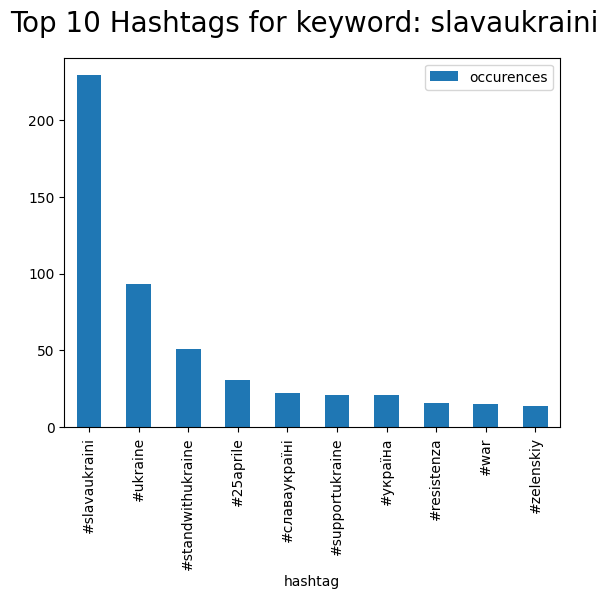

In [126]:
hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
plt.grid(False)
plt.suptitle('Top 10 Hashtags for keyword: slavaukraini', fontsize=20)

## Top words

In [127]:
words = df['processed_text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [128]:
words.head(10)

,word,occurences
27,slavaukraini,78.0
10,ukraine,72.0
47,standwithukraine,21.0
782,aprile,20.0
190,ucraina,20.0
931,della,17.0
762,non,17.0
28,war,16.0
823,resistenza,16.0
1155,25aprile,14.0


Text(0.5, 0.98, 'Top 10 Words for keyword: slavaukraini')

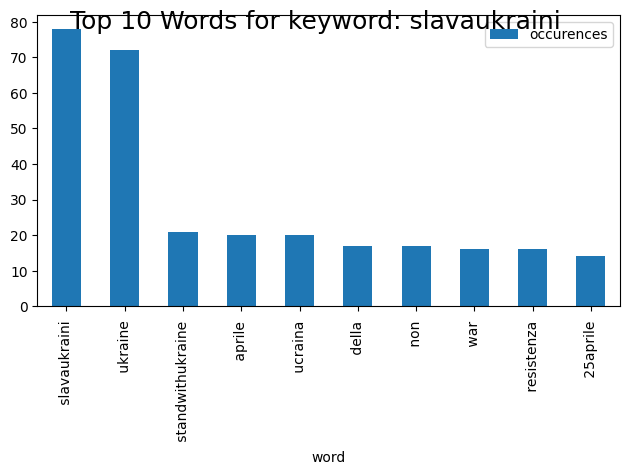

In [129]:
words[:10].plot(kind='bar',y='occurences',x='word')
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Words for keyword: slavaukraini', fontsize=18)

### Top Bigrams

In [130]:
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['processed_text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

In [131]:
bigramseries.head(10)

(25, aprile)                        32
(ukraine, slavaukraini)             25
(slavaukraini, ukraine)             15
(standwithukraine, slavaukraini)    14
(slava, ukraini)                    11
(zelenskyy, zelenskiy)               9
(carsforukraine, 4x4ukraine)         8
(4x4ukraine, freeukraine)            8
(europeismycountry, hexartist)       8
(freeukraine, europeismycountry)     8
dtype: int64

<Axes: title={'center': 'Top 10 Bigrams for keyword: slavaukraini'}>

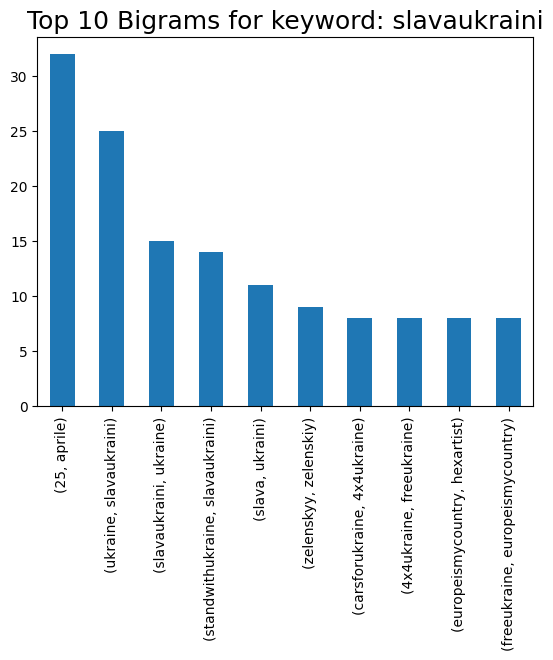

In [195]:
plt.title('Top 10 Bigrams for keyword: slavaukraini', fontsize=18)
bigramseries[:10].plot(kind='bar')

## Geolocalization of posts

In [178]:
geo = df['Location'].value_counts().to_frame().reset_index()
geo.columns = ['location','occurences']
geo.shape

(66, 2)

In [182]:
geo = geo.drop(geo.iloc[0].name)
geo.head(70)

,location,occurences
2,Calgary,4
3,Sztokholm,3
4,Klub Studio,3
5,Mediolan,3
6,Kijów,3
...,...,...
61,Alba,1
62,Europe,1
63,Band on the Wall,1
64,LCI - La Chaîne Info,1


In [189]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

locations = geo['location'].tolist()
geolocator = Nominatim(user_agent="geoapi")

def geocode_location(location):
    try:
        geocode_result = geolocator.geocode(location)
        return (geocode_result.latitude, geocode_result.longitude)
    except:
        return None

coordinates = [geocode_location(location) for location in locations]
location_dict = dict(zip(locations, coordinates))
# filtered_dict = {key: value for key, value in my_dict.items() if value is not None}
for key, value in location_dict.items():
    print(f"{key}: {value}")


Calgary: (51.0460954, -114.065465)
Sztokholm: None
Klub Studio: None
Mediolan: None
Kijów: None
Langelinieparken: None
Włochy: (42.6384261, 12.674297)
Bolonia: (44.4938203, 11.3426327)
Rouen: (49.4404591, 1.0939658)
British Embassy, Bratislava: (48.1423999, 17.107037347602606)
Frankfurt am Main, Germany: (50.1106444, 8.6820917)
Borodianka: (50.6437677, 29.9278296)
Eninger Weide: (48.4877144, 9.3002463)
Rzym: (41.8933203, 12.4829321)
Piazza Duomo, Milano: (45.463910150000004, 9.190642626255652)
Salt Lake City: (40.7596198, -111.886797)
Café Dlask: (50.9115121, 14.6234099)
Piazza Della Rotonda - Roma: (41.8994966, 12.4764863)
Viking Line Mariehamn: None
Irpin, Kyyivs'Ka Oblast', Ukraine: None
Lizbona: (38.7077507, -9.1365919)
Porto: (41.1494512, -8.6107884)
Międzynarodowe Centrum Kongresowe w Katowicach: None
Currabubula, New South Wales, Australia: (-31.2629311, 150.737191)
Tamarama Beach: (-33.90053485, 151.27061725605856)
Manhattan: (40.7896239, -73.9598939)
Hamburg: (53.550341, 10.00

In [191]:
geo['coordinates'] = geo['location'].map(location_dict)
geo.head(10)

,location,occurences,coordinates
2,Calgary,4,"(51.0460954, -114.065465)"
3,Sztokholm,3,None
4,Klub Studio,3,None
5,Mediolan,3,None
6,Kijów,3,None
7,Langelinieparken,2,None
8,Włochy,2,"(42.6384261, 12.674297)"
9,Bolonia,2,"(44.4938203, 11.3426327)"
10,Rouen,1,"(49.4404591, 1.0939658)"
11,"British Embassy, Bratislava",1,"(48.1423999, 17.107037347602606)"


In [192]:
import folium
m = folium.Map(location=[48, 0], zoom_start=3)

for index, row in geo.iterrows():
    if row['coordinates'] is None:
        continue
    folium.Marker(
        location=[row['coordinates'][0], row['coordinates'][1]],
        popup=row['location']
    ).add_to(m)

m

In [194]:
m.save('mapa.html')